In [1]:
# @title
!pip install qiskit
!pip install qiskit-aer

First, we need to import the packages that we need. This assumes that you have already installed qiskit via 'pip install qiskit'

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
%matplotlib inline

*First exercise:*
We build a simple circuit consisting of just one qubit and inspect the impact of a few gates on this circuit

In [3]:
#First we define the circuit and the number of qubits within it
my_one_qubit_circuit = QuantumCircuit(1)
#Now we simply measure it
my_one_qubit_circuit.measure_all()
#and draw it
my_one_qubit_circuit.draw(initial_state=True)

░ ┌─┐
    q: |0>─░─┤M├
           ░ └╥┘
meas: 0 1/════╩═
              0

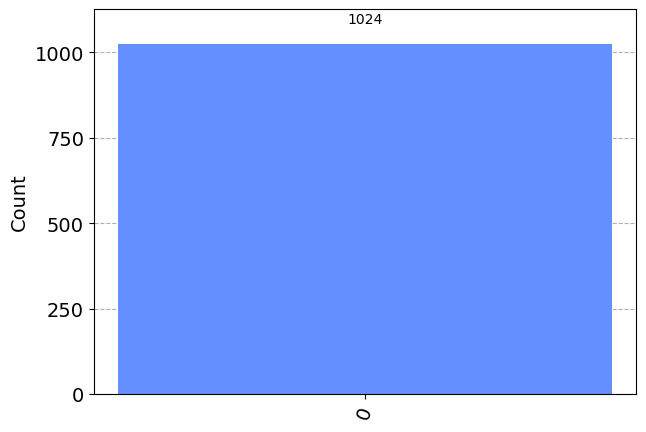

In [4]:
#Well, let's see how the states look like if we run a simulation
sim = Aer.get_backend('aer_simulator')
my_one_qubit_circuit.save_statevector()
result = sim.run(my_one_qubit_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

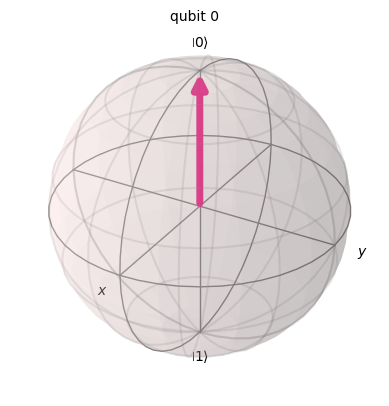

In [5]:
#let's now also print the Bloch sphere
state=result.get_statevector()
plot_bloch_multivector(state)

Not too surprisingly, nothing happened, as we did not do any operation on this qubit.
Let us now look at what a X gate does here. For this we build a new circuit.

In [6]:
my_circuit_with_x = QuantumCircuit(1)
my_circuit_with_x.x(0)
my_circuit_with_x.draw(initial_state=True)

┌───┐
q: |0>┤ X ├
      └───┘

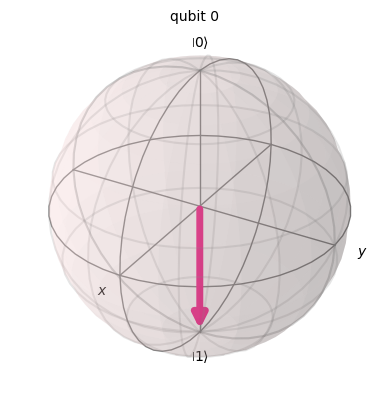

In [7]:
my_circuit_with_x.save_statevector()
result2 = sim.run(my_circuit_with_x).result()
state2=result2.get_statevector()
plot_bloch_multivector(state2)

This is as expected.

Try now to build a couple of circuits with Y, Z and H gates by yourself. Hint: Use here simply y, z and h.

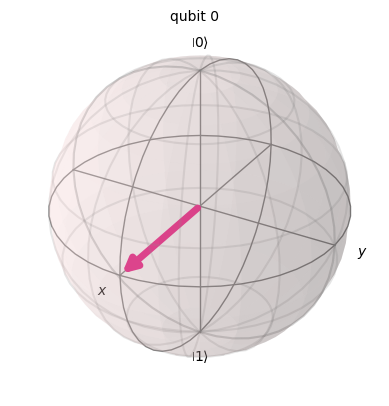

In [15]:
my_circuit_with_h = QuantumCircuit(1)
my_circuit_with_h.h(0)
my_circuit_with_h.draw(initial_state=True)

my_circuit_with_h.save_statevector()
result3 = sim.run(my_circuit_with_h).result()
state3=result3.get_statevector()
plot_bloch_multivector(state3)

*Second exercise*: We will now build a circuit that adds two integers, either 0 or 1. For this we also need a couple of 2-qubit gates, that we have not really introduced yet, but we explain them while we go.

In [16]:
#First, we need to create again a quantum circuit.
#This circuit should contain 4 qubits and 2 classical bits.
#The classical bits are necessary to contain the output of our calculation.
my_add_circuit = QuantumCircuit(4,2)
my_add_circuit.draw(initial_state=0)

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 2/

In [17]:
#Here,all qubits are in state 0. If now q_0 and q_1 are the two values that we would like to add, this
#means that we are adding here 0 and 0. Let's instead add 1 and 1. For this, we first need to change the 0's
#of the first two qubits to 1.
my_add_circuit.x(0)
my_add_circuit.x(1)
#then we draw a barrier. This does not do anything, but helps to display things nicely.
my_add_circuit.barrier()
my_add_circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
           ░ 
c: 2/════════

Now we introduce cnot gates. These gates execute a x gate on the target qubit if the control qubit is 1,
else it does nothing.
The first qubit in the argument is here the control qubit, the second the targe qubit.

In [18]:
my_add_circuit.cx(0,2)
my_add_circuit.cx(1,2)
my_add_circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───■───────
     ├───┤ ░   │       
q_1: ┤ X ├─░───┼────■──
     └───┘ ░ ┌─┴─┐┌─┴─┐
q_2: ──────░─┤ X ├┤ X ├
           ░ └───┘└───┘
q_3: ──────░───────────
           ░           
c: 2/══════════════════

The qubit q_2 will contain the first result, but we also need a qubit that will hold the carryover. This is q_3.
We now need to transport the result of our calculation to q_3.
For this we use a Toffoli gate. This is a gate acting on three qubits. Two qubits are here the control qubits and on the thirs qubit a x gate is performed if the other two gates are both 1.
Basically the Toffoli gate corresponds to a AND gate in classical computing.

In [19]:
my_add_circuit.ccx(0,1,3)
my_add_circuit.barrier()
my_add_circuit.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────■───░─
     ├───┤ ░   │         │   ░ 
q_1: ┤ X ├─░───┼────■────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ 
q_2: ──────░─┤ X ├┤ X ├──┼───░─
           ░ └───┘└───┘┌─┴─┐ ░ 
q_3: ──────░───────────┤ X ├─░─
           ░           └───┘ ░ 
c: 2/══════════════════════════

Now we only miss the measurement, which will also map the result of the calculation to the two classical bits.

In [20]:
#We map the result of q_2 to the first classical bit.
my_add_circuit.measure(2,0)
#and the one of q_3 to the second classical bit.
my_add_circuit.measure(3,1)
my_add_circuit.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

Now we also run a simulation on this circuit!

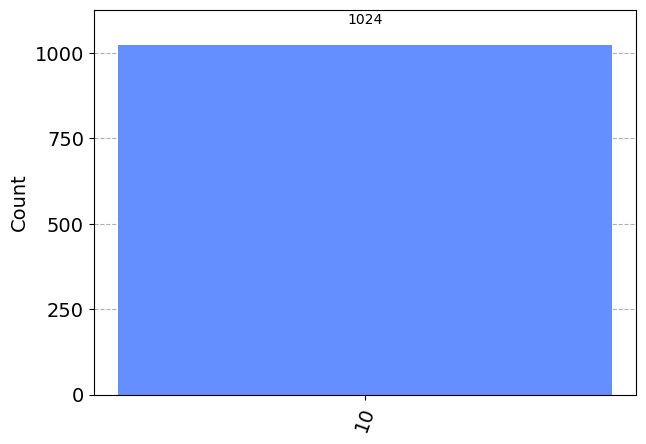

In [21]:
result3 = sim.run(my_add_circuit).result()
counts3 = result3.get_counts()
plot_histogram(counts3)

*Homework:*
* Construct a circuit to subtract two integers!
* Use the quantum fourier transform to perform the addition of two numbers